In [2]:
import incense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.realpath(".."))
import util_funcs
from copy import deepcopy
from addict import Dict
import pickle as pkl

In [3]:
successful_run_params = {"status":"COMPLETED", "experiment.name":"gender_patient_predict_conv_gridsearch", }

In [8]:
runs = util_funcs.get_sacred_runs()

In [9]:
paramRes = runs.find(successful_run_params)

In [10]:
scores = []
for res in paramRes:
    resDict = Dict(res)
    print(resDict.result)
    scores.append([resDict.result.gender.AUC, resDict.result.patient.acc])

{'gender': {'AUC': 0.5839121018632613, 'acc': 0.583005249343832}, 'history': {'gender_categorical_accuracy': [0.5919879914526757, 0.5894549208193338, 0.5977108547662702, 0.6008068299649166, 0.6048409795434538, 0.5996810207364482, 0.6054977015400371, 0.6006191951359109], 'gender_loss': [6.405811015006603, 6.480512800779449, 6.423324483142627, 6.335357904098687, 6.351158698645908, 6.433915657625378, 6.348001606346507, 6.423738878879821], 'loss': [6.548654602128442, 6.628565287721997, 6.572130780292056, 6.483972638865016, 6.497828911164764, 6.578589682664486, 6.492359414625396, 6.568133174886578], 'patient_categorical_accuracy': [0.06623510648330874, 0.07420958814916562, 0.07599211933682108, 0.07561684961118191, 0.08706257622666291, 0.1005722863384892, 0.10188573037848843, 0.10207336523178422], 'patient_loss': [14.28435896664022, 14.805248019283491, 14.880630511595145, 14.861472566262655, 14.667025402815998, 14.467403986360289, 14.43578328951202, 14.439431702266413], 'val_gender_categoric

In [12]:
scores = np.array(scores)
scores

array([[5.83912102e-01, 8.85826772e-03],
       [5.36268070e-01, 6.56167979e-04],
       [6.53680563e-01, 5.24934383e-02],
       [6.48920702e-01, 1.03018373e-01],
       [6.04341023e-01, 1.22375328e-01],
       [6.50505698e-01, 1.74540682e-01],
       [6.68779475e-01, 1.51902887e-01],
       [6.54976951e-01, 1.79461942e-01],
       [6.25474912e-01, 1.64370079e-01],
       [6.41093797e-01, 1.01706037e-01],
       [6.35298990e-01, 1.11548556e-01],
       [6.35385412e-01, 1.06299213e-01]])

Text(0, 0.5, 'Patient Accuracy')

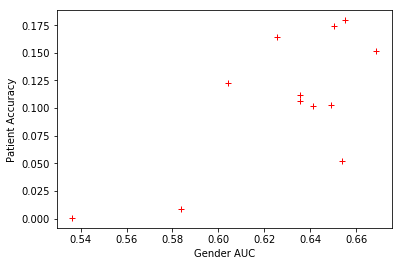

In [17]:
plt.plot(scores[:, 0], scores[:, 1], "r+")
plt.xlabel("Gender AUC")
plt.ylabel("Patient Accuracy")

In [3]:
testData  = pkl.load(open("/n/scratch2/ms994/standardized_simple_ensemble_test_data_seizure.pkl", "rb"))

Using TensorFlow backend.


In [6]:
testDataX = np.stack([testDatum[0] for testDatum in testData])

In [7]:
testDataY = np.stack([testDatum[1] for testDatum in testData])

In [16]:
testDataY = testDataY.reshape(1093*32, 2)

In [20]:
testDataY.mean(0)

array([0.9280364 , 0.07196363], dtype=float32)

In [21]:
import keras

In [22]:
cnn = keras.models.load_model("../RNVZMCQJBDFXIRVP.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [23]:
from keras.utils import multi_gpu_model

In [24]:
cnn = multi_gpu_model(cnn, 2)

In [27]:
testDataX = testDataX.reshape(1093*32, *testDataX.shape[2:])

In [28]:
y_pred = cnn.predict(testDataX)

In [31]:
np.sum(y_pred, axis=0)

array([34976.,     0.], dtype=float32)

In [ ]:
sampleInfo = pkl.

In [4]:
runs = util_funcs.get_sacred_runs()

In [2]:
successful_run_params = {"status":"COMPLETED", "experiment.name":"gender_predict_conv_gridsearch", "num_files":None, 'result.history': {'$exists':True}, '$or': [{'config.use_random_ensemble': False}, {'config.use_random_ensemble': {"$exists": False}}]}

In [2]:
successful_run_params = {"$or": [{"status":"COMPLETED"},{"status":"FAILED"}],}

In [ ]:
successful_run_params = 

In [5]:
total = runs.find(successful_run_params).count()
total

/home/ms994/miniconda3/envs/keras-redo/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


4223

In [10]:
allLengths = []
for i in range(4223):
    result = Dict(runs.find(successful_run_params)[i])
    allLengths.append(pd.Timedelta(result.stop_time-result.start_time))

In [14]:
total = pd.Timedelta(seconds=0)
for i in allLengths:
    total += i

In [15]:
total

Timedelta('27 days 05:08:50.153000')

In [5]:
allResults = Dict()

In [29]:
bestValScore = 10000
bestResult = None
bestCheatScore =  0
bestCheatResult = None
index = -1
cheatIndex = -1
for i in range(total):
    result = Dict(runs.find(successful_run_params)[i])
    allResults[i].config = result.config
    allResults[i].bestValScore = min(result.result.history.val_loss)
    allResults[i].history = result.result.history
    if (len(result.result.history["val_loss"]) != 0 and min(result.result.history["val_loss"]) < bestValScore):
        bestValScore = min(result.result.history["val_loss"])
        bestResult = allResults[i]
        index=i
    if (result.result.test_scores.auc > bestCheatScore):
        bestCheatScore = result.result.test_scores.auc
        bestCheatResult = allResults[i]
        cheatIndex = i
    allResults[i].testScore = result.result.test_scores

In [33]:
bestValScore, index,  bestResult,

(0.6007981523871422,
 114,
 {'config': {'batch_size': 64,
   'conv_spatial_filter': [3, 3],
   'conv_temporal_filter': [2, 3],
   'dropout': 0.25,
   'lr': 0.0001,
   'max_length': 500,
   'max_pool_size': [2, 2],
   'max_pool_stride': [1, 2],
   'model_name': 'A1A6D77C361B8D6F3FCBB196131A8AF0.h5',
   'n_process': 6,
   'num_conv_spatial_layers': 7,
   'num_conv_temporal_layers': 7,
   'num_epochs': 500,
   'num_files': None,
   'num_spatial_filter': 300,
   'num_temporal_filter': 300,
   'patience': 20,
   'precached_pkl': 'train_data.pkl',
   'precached_test_pkl': 'test_data.pkl',
   'ref': '01_tcp_ar',
   'seed': 169492458,
   'test_split': 'dev_test',
   'train_split': 'train',
   'use_cached_pkl': True,
   'use_early_stopping': True,
   'use_vp': False,
   'validation_size': 0.2},
  'bestValScore': 0.6007981523871422,
  'testScore': {'acc': 0.5536649214659686,
   'auc': 0.5895302988378528,
   'f1': 0.624862486248625},
  'history': {'binary_accuracy': [0.52001953125,
    0.5078125,

In [34]:
bestCheatScore, cheatIndex, bestCheatResult

(0.6516152462645268,
 119,
 {'config': {'batch_size': 64,
   'conv_spatial_filter': [2, 2],
   'conv_temporal_filter': [2, 3],
   'dropout': 0.25,
   'lr': 5e-05,
   'max_length': 500,
   'max_pool_size': [2, 2],
   'max_pool_stride': [1, 2],
   'model_name': '4DAA821EEF60686F59016A7FE1452863.h5',
   'n_process': 1,
   'num_conv_spatial_layers': 7,
   'num_conv_temporal_layers': 7,
   'num_epochs': 500,
   'num_files': None,
   'num_spatial_filter': 200,
   'num_temporal_filter': 300,
   'patience': 20,
   'precached_pkl': 'train_data.pkl',
   'precached_test_pkl': 'test_data.pkl',
   'ref': '01_tcp_ar',
   'seed': 44124645,
   'test_split': 'dev_test',
   'train_split': 'train',
   'use_cached_pkl': True,
   'use_early_stopping': True,
   'use_vp': False,
   'validation_size': 0.2},
  'bestValScore': 0.6873899772763252,
  'testScore': {'acc': 0.7447643979057592,
   'auc': 0.6516152462645268,
   'f1': 0.8299912816041848},
  'history': {'binary_accuracy': [0.50146484375,
    0.504394531

sbatch -n 1 --mem-per-cpu 32G -t 12:00:00 -p gpu --gres=gpu:1 run.sh use_vp=False lr=0.001 num_spatial_filter=300 num_temporal_filter=300 num_conv_spatial_layers=7 num_conv_temporal_layers=7 num_epochs=100 patience=20 conv_spatial_filter_3_3 conv_temporal_filter_2_3 use_cached_pkl=True model_name=$(hexdump -n 16 -e '4/4 "%08X" 1 "\n"' /dev/urandom).h5 simple_ensemble_samples n_process=8 batch_size=32 -D

In [8]:
runs.find(successful_run_params)[0]

{'_id': 2934,
 'experiment': {'name': 'gender_predict_conv_gridsearch',
  'base_dir': '/home/ms994/dbmi_eeg_clustering',
  'sources': [['clinical_text_analysis.py',
    ObjectId('5d2d5864eadb9a19a004b3ab')],
   ['constants.py', ObjectId('5d27d20008dbf0f57da81b62')],
   ['data_reader.py', ObjectId('5d2e0f3d396ada4c0d3e0c00')],
   ['keras_models/__init__.py', ObjectId('5d2c2b93fc0fc7746d130fa5')],
   ['keras_models/dataGen.py', ObjectId('5d2d5865eadb9a19a004b3af')],
   ['keras_models/vanPutten.py', ObjectId('5d2df305fc0fc77d11b17dcf')],
   ['predictGenderConvExp.py', ObjectId('5d2e3551396ada0cd357686e')],
   ['util_funcs.py', ObjectId('5d2e0d9deadb9a2f3caf61c0')],
   ['wf_analysis/__init__.py', ObjectId('5d24f280bef7d40ea2ab7519')],
   ['wf_analysis/datasets.py', ObjectId('5d293e67f2bc6e6e86d41863')]],
  'dependencies': ['addict==2.2.1',
   'Keras==2.2.4',
   'numpy==1.16.2',
   'pandas==0.24.2',
   'sacred==0.7.5',
   'scikit-learn==0.20.3'],
  'repositories': [{'url': 'git@github.com:S

In [71]:
trainAcc = allResults[index].history["loss"]
valAcc = allResults[index].history["val_loss"]

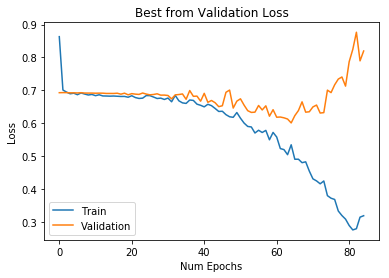

In [72]:
plt.plot(trainAcc)
plt.plot(valAcc)
plt.ylabel("Loss")
plt.xlabel("Num Epochs")
plt.title("Best from Validation Loss")
plt.legend(["Train", "Validation"])

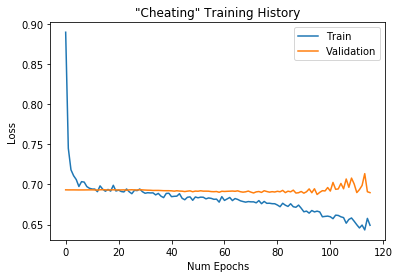

In [73]:
trainAcc = allResults[cheatIndex].history["loss"]
valAcc = allResults[cheatIndex].history["val_loss"]
plt.plot(trainAcc)
plt.plot(valAcc)
plt.ylabel("Loss")
plt.xlabel("Num Epochs")
plt.title('"Cheating" Training History')
plt.legend(["Train", "Validation"])

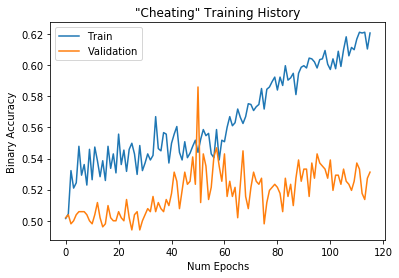

In [58]:
trainAcc = allResults[cheatIndex].history["binary_accuracy"]
valAcc = allResults[cheatIndex].history["val_binary_accuracy"]
plt.plot(trainAcc)
plt.plot(valAcc)
plt.title('"Cheating" Training History')
plt.ylabel("Binary Accuracy")
plt.xlabel("Num Epochs")
plt.legend(["Train", "Validation"])

In [54]:
trainAcc

{}

In [35]:
import seaborn as sn

In [68]:
allValScores = []
for key, result in allResults.items():
    allValScores.append(max(result.history["val_binary_accuracy"]))

Text(0, 0.5, 'freq')

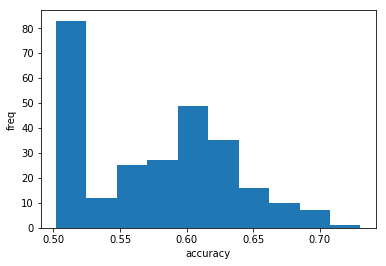

In [70]:
plt.hist(allValScores)
plt.xlabel("accuracy")
plt.ylabel("freq")